<a href="https://colab.research.google.com/github/utkarshkumarawasthi98/Machine-learning/blob/main/Assignment_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Custom Dataset - K=3
Cluster Centers:
 [[ 9.76688898 11.24255175]
 [ 3.87651749  9.3356098 ]
 [ 4.11806867  4.733353  ]]


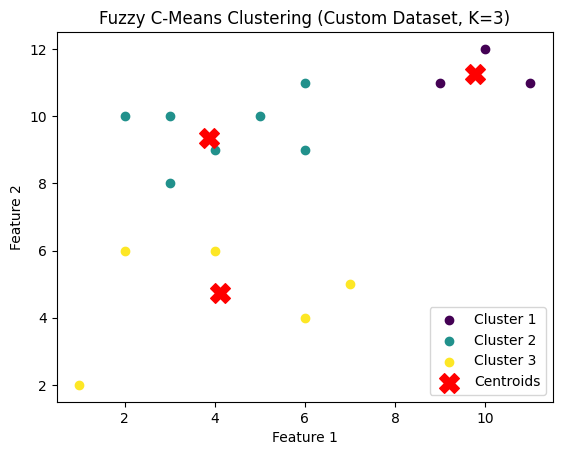


Points assigned to Cluster 1:
Point [11. 11.] -> Membership: 0.9544
Point [10. 12.] -> Membership: 0.9792
Point [ 9. 11.] -> Membership: 0.9685

Points assigned to Cluster 2:
Point [ 2. 10.] -> Membership: 0.8424
Point [6. 9.] -> Membership: 0.6882
Point [ 5. 10.] -> Membership: 0.8850
Point [4. 9.] -> Membership: 0.9897
Point [ 3. 10.] -> Membership: 0.9370
Point [3. 8.] -> Membership: 0.7940
Point [ 6. 11.] -> Membership: 0.5949

Points assigned to Cluster 3:
Point [2. 6.] -> Membership: 0.6733
Point [6. 4.] -> Membership: 0.8439
Point [1. 2.] -> Membership: 0.7231
Point [7. 5.] -> Membership: 0.6789
Point [4. 6.] -> Membership: 0.8533


In [10]:
# Given Data Set for k=3

import numpy as np
import matplotlib.pyplot as plt

# Fuzzy C-Means implementation
def initialize_membership_matrix(n, c):
    U = np.random.dirichlet(np.ones(c), size=n)
    return U

def calculate_cluster_centers(U, X, m):
    um = U ** m
    centers = (um.T @ X) / um.sum(axis=0)[:, None]
    return centers

def update_membership_matrix(U, centers, X, m):
    power = 2 / (m - 1)
    for i in range(len(X)):
        for j in range(len(centers)):
            denominator_sum = np.sum([(np.linalg.norm(X[i] - centers[j]) / np.linalg.norm(X[i] - centers[k])) ** power for k in range(len(centers))])
            U[i, j] = 1 / denominator_sum
    return U

def has_converged(U, U_old, threshold=1e-5):
    return np.linalg.norm(U - U_old) < threshold

def fuzzy_c_means(X, c, m=2, max_iter=100, threshold=1e-5):
    n = len(X)
    U = initialize_membership_matrix(n, c)

    for iteration in range(max_iter):
        U_old = U.copy()
        centers = calculate_cluster_centers(U, X, m)
        U = update_membership_matrix(U, centers, X, m)

        if has_converged(U, U_old, threshold):
            break

    return centers, U

def plot_clusters(X, centers, U, title):
    # Determine cluster assignments based on highest membership value
    cluster_assignments = np.argmax(U, axis=1)

    # Define colors for each cluster
    n_clusters = centers.shape[0]
    colors = plt.cm.viridis(np.linspace(0, 1, n_clusters))

    # Plot each point with the color of its assigned cluster
    for i in range(n_clusters):
        cluster_points = X[cluster_assignments == i]
        plt.scatter(cluster_points[:, 0], cluster_points[:, 1], color=colors[i], label=f'Cluster {i+1}')

    # Plot cluster centers
    plt.scatter(centers[:, 0], centers[:, 1], marker='X', s=200, color='red', label='Centroids')
    plt.title(title)
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.legend()
    plt.show()


# Custom dataset
X_custom = np.array([
    [2.0, 10.0], [2.0, 6.0], [11.0, 11.0],
    [6.0, 9.0], [6.0, 4.0], [1.0, 2.0],
    [5.0, 10.0], [4.0, 9.0], [10.0, 12.0],
    [7.0, 5.0], [9.0, 11.0], [4.0, 6.0],
    [3.0, 10.0], [3.0, 8.0], [6.0, 11.0]
])

# Run FCM for K=3 on custom dataset
centers_3, U_3 = fuzzy_c_means(X_custom, c=3)

print("Custom Dataset - K=3")
print("Cluster Centers:\n", centers_3)

# Plot the clusters for K=3 on custom dataset
plot_clusters(X_custom, centers_3, U_3, "Fuzzy C-Means Clustering (Custom Dataset, K=3)")

# Assign each point to the cluster with the highest membership value
cluster_assignments = np.argmax(U_3, axis=1)

# Display the points assigned to each cluster
for i in range(3):
    print(f"\nPoints assigned to Cluster {i+1}:")
    for j in range(len(X_custom)):
        if cluster_assignments[j] == i:
            print(f"Point {X_custom[j]} -> Membership: {U_3[j, i]:.4f}")


Custom Dataset - K=5
Cluster Centers:
 [[10.01607299 11.35453126]
 [ 1.11148057  2.31707806]
 [ 5.45307261  9.8758856 ]
 [ 2.92777945  8.98369665]
 [ 6.17754626  4.66153969]]


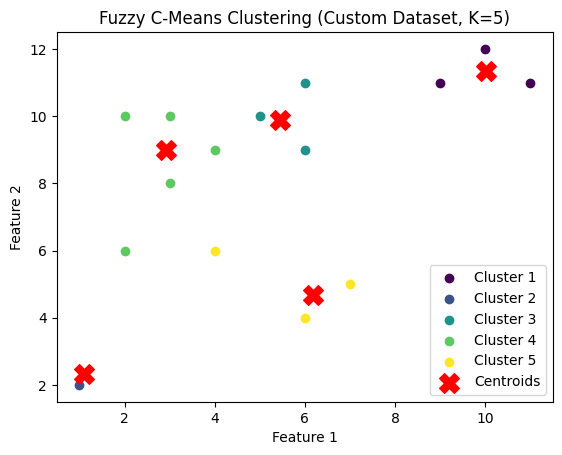


Points assigned to Cluster 1:
Point [11. 11.] -> Membership: 0.9315
Point [10. 12.] -> Membership: 0.9689
Point [ 9. 11.] -> Membership: 0.8738

Points assigned to Cluster 2:
Point [1. 2.] -> Membership: 0.9925

Points assigned to Cluster 3:
Point [6. 9.] -> Membership: 0.8102
Point [ 5. 10.] -> Membership: 0.9434
Point [ 6. 11.] -> Membership: 0.7896

Points assigned to Cluster 4:
Point [ 2. 10.] -> Membership: 0.7936
Point [2. 6.] -> Membership: 0.3767
Point [4. 9.] -> Membership: 0.6678
Point [ 3. 10.] -> Membership: 0.8091
Point [3. 8.] -> Membership: 0.8396

Points assigned to Cluster 5:
Point [6. 4.] -> Membership: 0.9511
Point [7. 5.] -> Membership: 0.9179
Point [4. 6.] -> Membership: 0.4115


In [11]:
# Given Data Set for k=5

import numpy as np
import matplotlib.pyplot as plt

# Fuzzy C-Means implementation
def initialize_membership_matrix(n, c):
    U = np.random.dirichlet(np.ones(c), size=n)
    return U

def calculate_cluster_centers(U, X, m):
    um = U ** m
    centers = (um.T @ X) / um.sum(axis=0)[:, None]
    return centers

def update_membership_matrix(U, centers, X, m):
    power = 2 / (m - 1)
    for i in range(len(X)):
        for j in range(len(centers)):
            denominator_sum = np.sum([(np.linalg.norm(X[i] - centers[j]) / np.linalg.norm(X[i] - centers[k])) ** power for k in range(len(centers))])
            U[i, j] = 1 / denominator_sum
    return U

def has_converged(U, U_old, threshold=1e-5):
    return np.linalg.norm(U - U_old) < threshold

def fuzzy_c_means(X, c, m=2, max_iter=100, threshold=1e-5):
    n = len(X)
    U = initialize_membership_matrix(n, c)

    for iteration in range(max_iter):
        U_old = U.copy()
        centers = calculate_cluster_centers(U, X, m)
        U = update_membership_matrix(U, centers, X, m)

        if has_converged(U, U_old, threshold):
            break

    return centers, U

def plot_clusters(X, centers, U, title):
    # Determine cluster assignments based on highest membership value
    cluster_assignments = np.argmax(U, axis=1)

    # Define colors for each cluster
    n_clusters = centers.shape[0]
    colors = plt.cm.viridis(np.linspace(0, 1, n_clusters))

    # Plot each point with the color of its assigned cluster
    for i in range(n_clusters):
        cluster_points = X[cluster_assignments == i]
        plt.scatter(cluster_points[:, 0], cluster_points[:, 1], color=colors[i], label=f'Cluster {i+1}')

    # Plot cluster centers
    plt.scatter(centers[:, 0], centers[:, 1], marker='X', s=200, color='red', label='Centroids')
    plt.title(title)
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.legend()
    plt.show()


# Custom dataset
X_custom = np.array([
    [2.0, 10.0], [2.0, 6.0], [11.0, 11.0],
    [6.0, 9.0], [6.0, 4.0], [1.0, 2.0],
    [5.0, 10.0], [4.0, 9.0], [10.0, 12.0],
    [7.0, 5.0], [9.0, 11.0], [4.0, 6.0],
    [3.0, 10.0], [3.0, 8.0], [6.0, 11.0]
])

# Run FCM for K=5 on custom dataset
centers_5, U_5 = fuzzy_c_means(X_custom, c=5)

print("Custom Dataset - K=5")
print("Cluster Centers:\n", centers_5)

# Plot the clusters for K=5 on custom dataset
plot_clusters(X_custom, centers_5, U_5, "Fuzzy C-Means Clustering (Custom Dataset, K=5)")

# Assign each point to the cluster with the highest membership value
cluster_assignments = np.argmax(U_5, axis=1)

# Display the points assigned to each cluster
for i in range(5):
    print(f"\nPoints assigned to Cluster {i+1}:")
    for j in range(len(X_custom)):
        if cluster_assignments[j] == i:
            print(f"Point {X_custom[j]} -> Membership: {U_5[j, i]:.4f}")


Iris Dataset - K=3
Cluster Centers:
 [[5.00396596 3.41408881 1.48281561 0.25354635]
 [6.77501244 3.05238262 5.6467833  2.05354724]
 [5.88893336 2.76106972 4.36395311 1.3973158 ]]


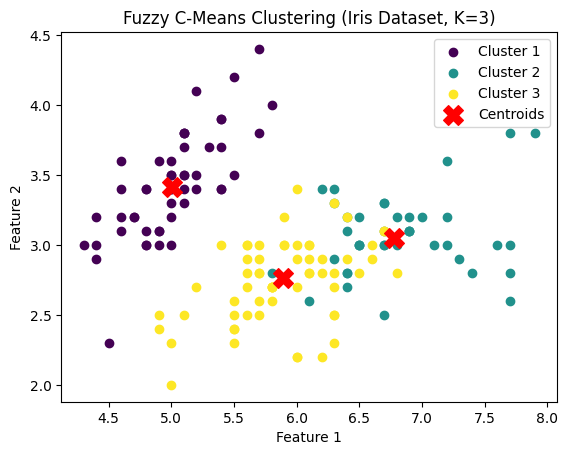


Points assigned to Cluster 1:
Point [5.1 3.5 1.4 0.2] -> Membership: 0.9966
Point [4.9 3.  1.4 0.2] -> Membership: 0.9759
Point [4.7 3.2 1.3 0.2] -> Membership: 0.9798
Point [4.6 3.1 1.5 0.2] -> Membership: 0.9674
Point [5.  3.6 1.4 0.2] -> Membership: 0.9945
Point [5.4 3.9 1.7 0.4] -> Membership: 0.9346
Point [4.6 3.4 1.4 0.3] -> Membership: 0.9795
Point [5.  3.4 1.5 0.2] -> Membership: 0.9995
Point [4.4 2.9 1.4 0.2] -> Membership: 0.9304
Point [4.9 3.1 1.5 0.1] -> Membership: 0.9827
Point [5.4 3.7 1.5 0.2] -> Membership: 0.9680
Point [4.8 3.4 1.6 0.2] -> Membership: 0.9921
Point [4.8 3.  1.4 0.1] -> Membership: 0.9706
Point [4.3 3.  1.1 0.1] -> Membership: 0.9230
Point [5.8 4.  1.2 0.2] -> Membership: 0.8898
Point [5.7 4.4 1.5 0.4] -> Membership: 0.8413
Point [5.4 3.9 1.3 0.4] -> Membership: 0.9469
Point [5.1 3.5 1.4 0.3] -> Membership: 0.9967
Point [5.7 3.8 1.7 0.3] -> Membership: 0.9041
Point [5.1 3.8 1.5 0.3] -> Membership: 0.9792
Point [5.4 3.4 1.7 0.2] -> Membership: 0.9686
Poi

In [12]:
# IRIS dataset for k=3

import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

# Fuzzy C-Means implementation
def initialize_membership_matrix(n, c):
    U = np.random.dirichlet(np.ones(c), size=n)
    return U

def calculate_cluster_centers(U, X, m):
    um = U ** m
    centers = (um.T @ X) / um.sum(axis=0)[:, None]
    return centers

def update_membership_matrix(U, centers, X, m):
    power = 2 / (m - 1)
    for i in range(len(X)):
        for j in range(len(centers)):
            denominator_sum = np.sum([(np.linalg.norm(X[i] - centers[j]) / np.linalg.norm(X[i] - centers[k])) ** power for k in range(len(centers))])
            U[i, j] = 1 / denominator_sum
    return U

def has_converged(U, U_old, threshold=1e-5):
    return np.linalg.norm(U - U_old) < threshold

def fuzzy_c_means(X, c, m=2, max_iter=100, threshold=1e-5):
    n = len(X)
    U = initialize_membership_matrix(n, c)

    for iteration in range(max_iter):
        U_old = U.copy()
        centers = calculate_cluster_centers(U, X, m)
        U = update_membership_matrix(U, centers, X, m)

        if has_converged(U, U_old, threshold):
            break

    return centers, U

def plot_clusters(X, centers, U, title):
    # Determine cluster assignments based on highest membership value
    cluster_assignments = np.argmax(U, axis=1)

    # Define colors for each cluster
    n_clusters = centers.shape[0]
    colors = plt.cm.viridis(np.linspace(0, 1, n_clusters))

    # Plot each point with the color of its assigned cluster
    for i in range(n_clusters):
        cluster_points = X[cluster_assignments == i]
        plt.scatter(cluster_points[:, 0], cluster_points[:, 1], color=colors[i], label=f'Cluster {i+1}')

    # Plot cluster centers
    plt.scatter(centers[:, 0], centers[:, 1], marker='X', s=200, color='red', label='Centroids')
    plt.title(title)
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.legend()
    plt.show()


# Load Iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# Run FCM for K=3 on Iris dataset
centers_3, U_3 = fuzzy_c_means(X, c=3)

print("Iris Dataset - K=3")
print("Cluster Centers:\n", centers_3)

# Plot the clusters for K=3 on Iris dataset
plot_clusters(X, centers_3, U_3, "Fuzzy C-Means Clustering (Iris Dataset, K=3)")

# Assign each point to the cluster with the highest membership value
cluster_assignments = np.argmax(U_3, axis=1)

# Display the points assigned to each cluster
for i in range(3):
    print(f"\nPoints assigned to Cluster {i+1}:")
    for j in range(len(X)):
        if cluster_assignments[j] == i:
            print(f"Point {X[j]} -> Membership: {U_3[j, i]:.4f}")


Iris Dataset - K=5
Cluster Centers:
 [[4.99887834 3.41808563 1.46794236 0.2461613 ]
 [6.52515184 3.03741758 5.44716034 2.08417497]
 [7.43736873 3.07971501 6.27731985 2.05280236]
 [6.19078028 2.87797357 4.70995136 1.55717165]
 [5.5850004  2.61665566 3.94917493 1.21212581]]


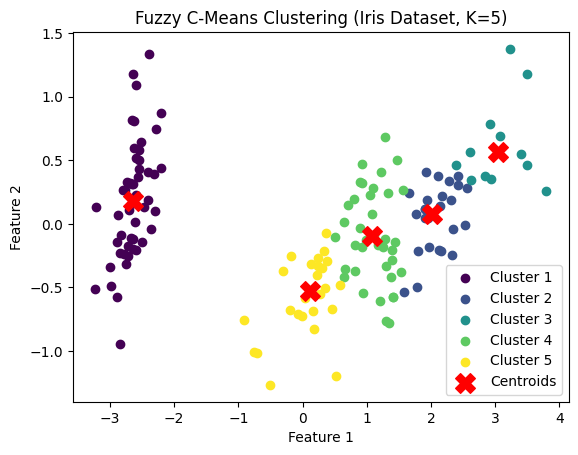


Points assigned to Cluster 1:
Point [5.1 3.5 1.4 0.2] -> Membership: 0.9938
Point [4.9 3.  1.4 0.2] -> Membership: 0.9516
Point [4.7 3.2 1.3 0.2] -> Membership: 0.9611
Point [4.6 3.1 1.5 0.2] -> Membership: 0.9353
Point [5.  3.6 1.4 0.2] -> Membership: 0.9899
Point [5.4 3.9 1.7 0.4] -> Membership: 0.8741
Point [4.6 3.4 1.4 0.3] -> Membership: 0.9601
Point [5.  3.4 1.5 0.2] -> Membership: 0.9990
Point [4.4 2.9 1.4 0.2] -> Membership: 0.8671
Point [4.9 3.1 1.5 0.1] -> Membership: 0.9650
Point [5.4 3.7 1.5 0.2] -> Membership: 0.9369
Point [4.8 3.4 1.6 0.2] -> Membership: 0.9837
Point [4.8 3.  1.4 0.1] -> Membership: 0.9420
Point [4.3 3.  1.1 0.1] -> Membership: 0.8569
Point [5.8 4.  1.2 0.2] -> Membership: 0.8028
Point [5.7 4.4 1.5 0.4] -> Membership: 0.7278
Point [5.4 3.9 1.3 0.4] -> Membership: 0.8994
Point [5.1 3.5 1.4 0.3] -> Membership: 0.9935
Point [5.7 3.8 1.7 0.3] -> Membership: 0.8217
Point [5.1 3.8 1.5 0.3] -> Membership: 0.9589
Point [5.4 3.4 1.7 0.2] -> Membership: 0.9348
Poi

In [13]:
# IRIS dataset for k=3

import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.decomposition import PCA

# Fuzzy C-Means implementation
def initialize_membership_matrix(n, c):
    U = np.random.dirichlet(np.ones(c), size=n)
    return U

def calculate_cluster_centers(U, X, m):
    um = U ** m
    centers = (um.T @ X) / um.sum(axis=0)[:, None]
    return centers

def update_membership_matrix(U, centers, X, m):
    power = 2 / (m - 1)
    for i in range(len(X)):
        for j in range(len(centers)):
            denominator_sum = np.sum([(np.linalg.norm(X[i] - centers[j]) / np.linalg.norm(X[i] - centers[k])) ** power for k in range(len(centers))])
            U[i, j] = 1 / denominator_sum
    return U

def has_converged(U, U_old, threshold=1e-5):
    return np.linalg.norm(U - U_old) < threshold

def fuzzy_c_means(X, c, m=2, max_iter=100, threshold=1e-5):
    n = len(X)
    U = initialize_membership_matrix(n, c)

    for iteration in range(max_iter):
        U_old = U.copy()
        centers = calculate_cluster_centers(U, X, m)
        U = update_membership_matrix(U, centers, X, m)

        if has_converged(U, U_old, threshold):
            break

    return centers, U

def plot_clusters(X, centers, U, title):
    # Reduce dimensions to 2D for visualization
    pca = PCA(n_components=2)
    X_2D = pca.fit_transform(X)
    centers_2D = pca.transform(centers)

    # Determine cluster assignments based on highest membership value
    cluster_assignments = np.argmax(U, axis=1)

    # Define colors for each cluster
    n_clusters = centers.shape[0]
    colors = plt.cm.viridis(np.linspace(0, 1, n_clusters))

    # Plot each point with the color of its assigned cluster
    for i in range(n_clusters):
        cluster_points = X_2D[cluster_assignments == i]
        plt.scatter(cluster_points[:, 0], cluster_points[:, 1], color=colors[i], label=f'Cluster {i+1}')

    # Plot cluster centers
    plt.scatter(centers_2D[:, 0], centers_2D[:, 1], marker='X', s=200, color='red', label='Centroids')
    plt.title(title)
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.legend()
    plt.show()


# Load Iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# Run FCM for K=5 on Iris dataset
centers_5, U_5 = fuzzy_c_means(X, c=5)

print("Iris Dataset - K=5")
print("Cluster Centers:\n", centers_5)

# Plot the clusters for K=5 on Iris dataset
plot_clusters(X, centers_5, U_5, "Fuzzy C-Means Clustering (Iris Dataset, K=5)")

# Assign each point to the cluster with the highest membership value
cluster_assignments = np.argmax(U_5, axis=1)

# Display the points assigned to each cluster
for i in range(5):
    print(f"\nPoints assigned to Cluster {i+1}:")
    for j in range(len(X)):
        if cluster_assignments[j] == i:
            print(f"Point {X[j]} -> Membership: {U_5[j, i]:.4f}")
